# A Data visualisation for the stats of a crappy game

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Overview

In [19]:
df = pd.read_csv("players.csv")
print(df.info())
print(df.describe())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             20 non-null     int64 
 1   NAME           20 non-null     object
 2   NB_OF_PUNCHES  20 non-null     int64 
 3   BRICKS_BROKEN  20 non-null     int64 
 4   WALLS_PASSED   20 non-null     int64 
 5   MISS           20 non-null     int64 
 6   TIME           20 non-null     int64 
 7   LEVEL          20 non-null     object
 8   DIFFICULTY     20 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 1.5+ KB
None
             ID  NB_OF_PUNCHES  BRICKS_BROKEN  WALLS_PASSED        MISS  \
count  20.00000      20.000000      20.000000     20.000000   20.000000   
mean   10.50000     104.850000      57.200000     15.350000   22.050000   
std     5.91608      74.754528      14.937061      3.344674   38.166498   
min     1.00000      51.000000      39.000000      9.000000    0.00000

,ID,NAME,NB_OF_PUNCHES,BRICKS_BROKEN,WALLS_PASSED,MISS,TIME,LEVEL,DIFFICULTY
0,1,Aure,113,65,19,24,60200,endless,4
1,2,Aure,73,53,14,5,46600,endless,3
2,3,Aure,87,59,15,15,50800,endless,4
3,4,Aure,74,47,13,8,44200,endless,3
4,5,Aure,100,69,18,11,58600,endless,4


In [ ]:
df = df.sort_values(by= ["NAME", "ID"])

players = df["NAME"].unique()
len(players)

4

Here we have the data gathered from 4 players.        
Each player played 5 games.         
The games are ordered chronologicaly    

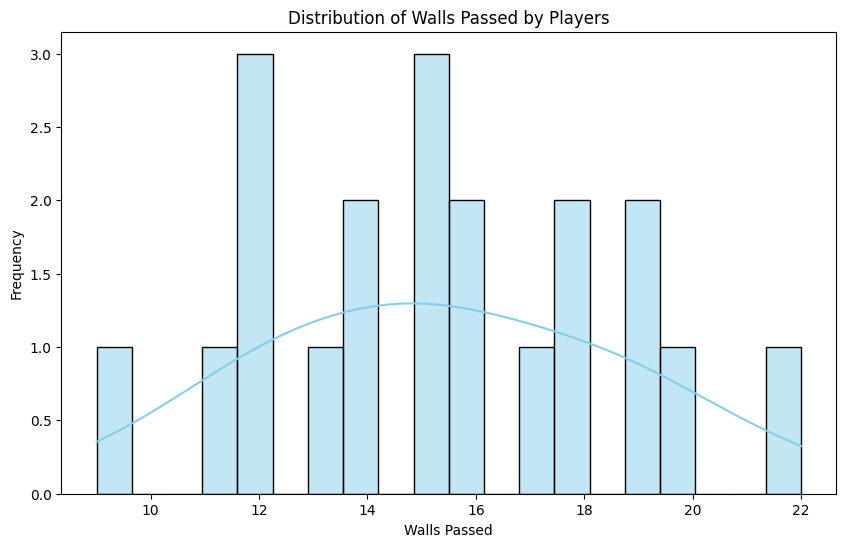

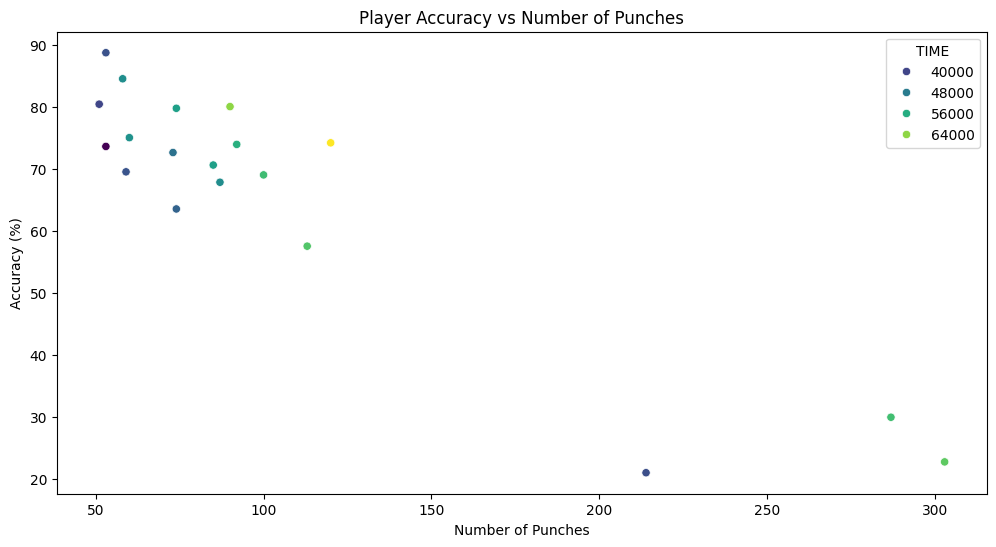

C:\Users\ilian\AppData\Local\Temp\ipykernel_15560\194571157.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_players['NAME'], y=top_players['WALLS_PASSED'], palette='coolwarm')


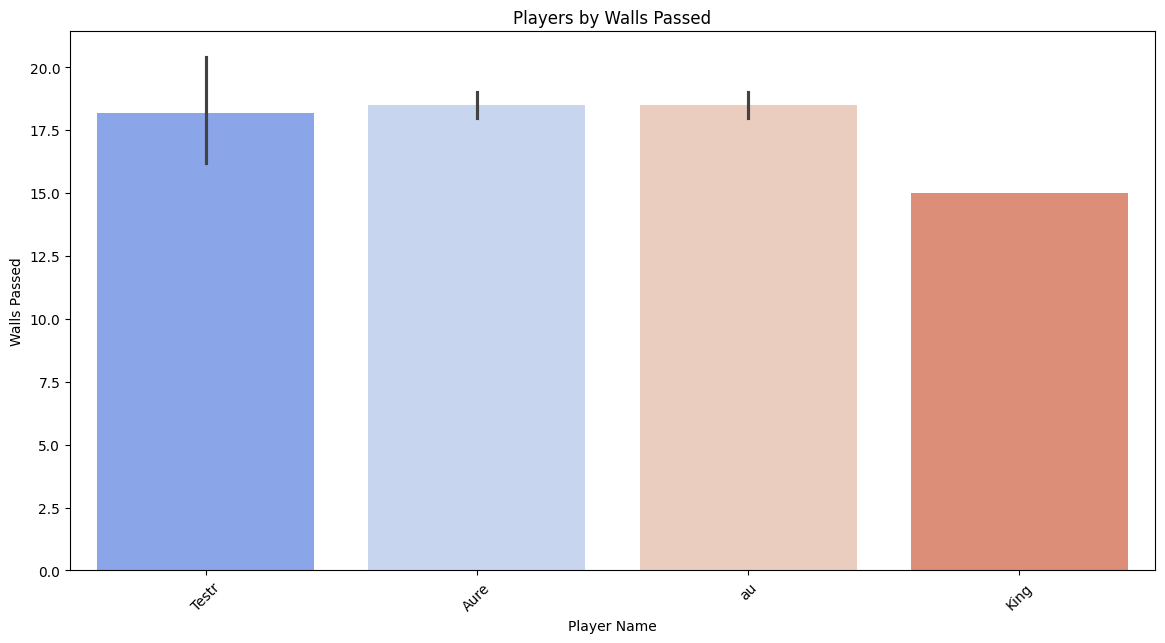

In [21]:
# Visualization: Distribution of scores
plt.figure(figsize=(10, 6))
sns.histplot(df['WALLS_PASSED'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Walls Passed by Players')
plt.xlabel('Walls Passed')
plt.ylabel('Frequency')
plt.show()

# Visualization: Relationship between accuracy and punches
df['Accuracy (%)'] = (df['BRICKS_BROKEN'] / df['NB_OF_PUNCHES']) * 100
plt.figure(figsize=(12, 6))
sns.scatterplot(x='NB_OF_PUNCHES', y='Accuracy (%)', data=df, hue='TIME', palette='viridis')
plt.title('Player Accuracy vs Number of Punches')
plt.xlabel('Number of Punches')
plt.ylabel('Accuracy (%)')
plt.show()

# Visualize top players by walls passed
top_players = df.sort_values(by='WALLS_PASSED', ascending=False).head(10)
plt.figure(figsize=(14, 7))
sns.barplot(x=top_players['NAME'], y=top_players['WALLS_PASSED'], palette='coolwarm')
plt.title('Players by Walls Passed')
plt.xlabel('Player Name')
plt.ylabel('Walls Passed')
plt.xticks(rotation=45)
plt.show()